# Text Summarization With BERT

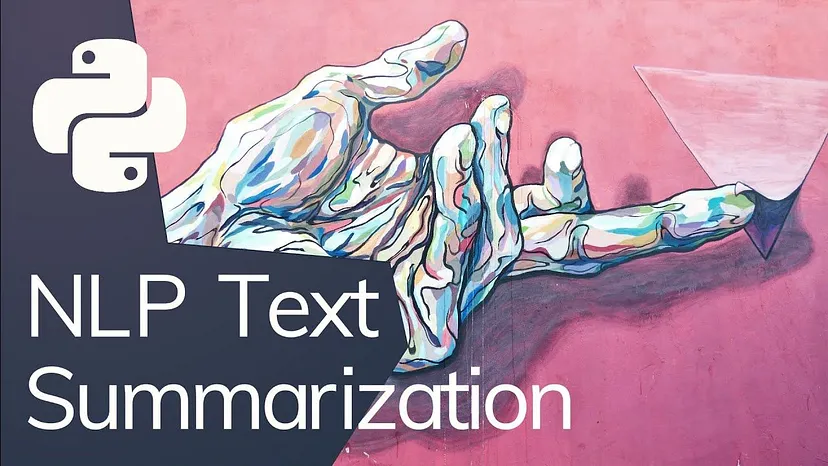

# Install

In [7]:
# !pip install transformers
# !pip install bert-extractive-summarizer
# !pip install spacy
# !pip install datasets
# !pip install sentencepiece

# Import

In [5]:
import datasets
import huggingface_hub
import matplotlib.pyplot as plt
import transformers
import pandas as pd

# Text Classification

In [3]:
# Text Classification
from transformers import pipeline
classifier = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\91956\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\91956\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91956\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [15]:
df = pd.read_csv("IMDB Dataset.csv")

df_top10 = df.head(10).copy()
# Function to apply the classifier and extract label and score
def get_sentiment(review):
    result = classifier(review)[0]
    return pd.Series({'sentiment_cal': result['label'].lower(), 'score': result['score']})

# Apply the function to the DataFrame
df_top10[['sentiment_cal', 'score']] = df_top10['review'].apply(get_sentiment)

# Print the modified DataFrame
print(df_top10)


                                              review sentiment sentiment_cal  \
0  One of the other reviewers has mentioned that ...  positive      negative   
1  A wonderful little production. <br /><br />The...  positive      positive   
2  I thought this was a wonderful way to spend ti...  positive      positive   
3  Basically there's a family where a little boy ...  negative      negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive      positive   
5  Probably my all-time favorite movie, a story o...  positive      positive   
6  I sure would like to see a resurrection of a u...  positive      positive   
7  This show was an amazing, fresh & innovative i...  negative      negative   
8  Encouraged by the positive comments about this...  negative      negative   
9  If you like original gut wrenching laughter yo...  positive      positive   

      score  
0  0.512120  
1  0.999377  
2  0.999190  
3  0.999172  
4  0.998824  
5  0.999768  
6  0.916026  
7  0.99

In [16]:
df_top10

,review,sentiment,sentiment_cal,score
0,One of the other reviewers has mentioned that ...,positive,negative,0.512120
1,A wonderful little production. <br /><br />The...,positive,positive,0.999377
2,I thought this was a wonderful way to spend ti...,positive,positive,0.999190
3,Basically there's a family where a little boy ...,negative,negative,0.999172
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,positive,0.998824
5,"Probably my all-time favorite movie, a story o...",positive,positive,0.999768
6,I sure would like to see a resurrection of a u...,positive,positive,0.916026
7,"This show was an amazing, fresh & innovative i...",negative,negative,0.999637
8,Encouraged by the positive comments about this...,negative,negative,0.999722
9,If you like original gut wrenching laughter yo...,positive,positive,0.999701


# Text - Summarization

In [20]:
summarizer = pipeline('summarization')
df = pd.read_csv("IMDB Dataset.csv")

df_top10 = df.head(10).copy()
# Function to apply the classifier and extract label and score
def get_summary(review):
    result = summarizer( review, clean_up_tokenization_spaces=True, max_length=60)
    print(result[0]['summary_text'])

# Apply the function to the DataFrame
df_top10['review'].apply(get_summary)



No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\91956\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


 The first episode I ever saw struck me as so nasty it was surreal, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. The main appeal of the show is due to the fact that it goes where other shows wouldn
 The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the
 This was the most I'd laughed at one of Woody Allen's comedies in years (dare I say a decade?). This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Super
 Movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie. As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all t

Your max_length is set to 60, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


 The film's only song - a lame country tune - is played no less than four times. The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. The only thing that prevents me giving this a
 If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it. Even my mother liked it. Great Camp!!! If you love it, you will be able to enjoy it.


0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: review, dtype: object